In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
mdf = pd.read_csv('melted_data.csv', index_col='sub_id')
ddf = pd.read_csv('diff_data.csv', index_col='sub_id')

In [68]:
def print_cols(df):
    i = 0
    for cols in df.columns:
        print(i, cols)
        i += 1

In [69]:
def print_m_sd(df, var, factor):
    gr_df = df.groupby(factor)
    return gr_df.loc[:, var]

In [70]:
print_cols(mdf)

0 condition
1 pain_max
2 pain_avg
3 pain_contr
4 pain_thresh
5 pain_toler
6 own_mood
7 music_mood
8 music_pref
9 order
10 song_order
11 hr
12 bp_sys
13 bp_dias
14 nitt


In [71]:
print_cols(ddf)

0 condition
1 pain_max
2 pain_avg
3 pain_contr
4 pain_thresh
5 pain_toler
6 own_mood_vs_noise
7 own_mood_vs_curr
8 music_pref
9 order
10 song_order
11 hr
12 bp_sys
13 bp_dias


In [72]:
# config
sns.set_palette('muted')
catplot_kind = 'boxen'

## Max pain

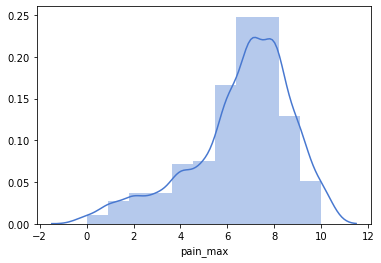

In [73]:
sns.distplot(mdf.pain_max, bins=11)

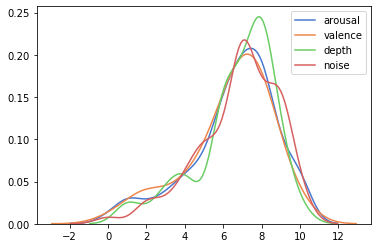

In [74]:
# kdeplot of conditions
sns.kdeplot(mdf.loc[mdf.condition == 'arousal', 'pain_max'], label='arousal')
sns.kdeplot(mdf.loc[mdf.condition == 'valence', 'pain_max'], label='valence')
sns.kdeplot(mdf.loc[mdf.condition == 'depth', 'pain_max'],label='depth')
sns.kdeplot(mdf.loc[mdf.condition == 'noise', 'pain_max'], label='noise')

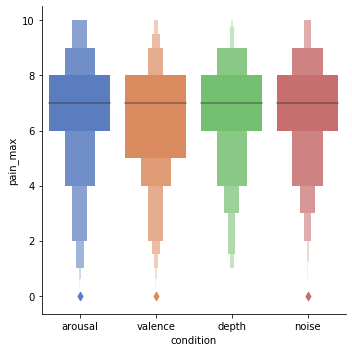

In [75]:
sns.catplot(x='condition', y='pain_max', kind=catplot_kind, data=mdf)

In [76]:
pd.DataFrame({'mean': round(mdf.groupby('condition').pain_max.mean(), 2),
             'sd': round(mdf.groupby('condition').pain_max.std(), 2)})

,mean,sd
condition,,
arousal,6.54,2.29
depth,6.68,2.07
noise,6.81,2.10
valence,6.36,2.23


```
$ANOVA
     Effect DFn DFd        F          p p<.05         ges
2 condition   3 237 3.409981 0.01825983     * 0.006266266

$`Mauchly's Test for Sphericity`
     Effect         W         p p<.05
2 condition 0.9084003 0.1882052      

$`Sphericity Corrections`
     Effect       GGe      p[GG] p[GG]<.05       HFe      p[HF] p[HF]<.05
2 condition 0.9447174 0.02037352         * 0.9835212 0.01886523         *


	Pairwise comparisons using paired t tests 

data:  mdf$pain_max and mdf$condition 

        arousal depth noise
depth   1.000   -     -    
noise   0.527   1.000 -    
valence 0.866   0.219 0.023

P value adjustment method: bonferroni 
```

## Average pain

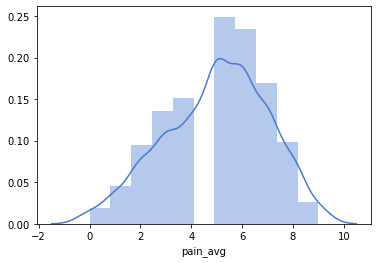

In [77]:
sns.distplot(mdf.pain_avg, bins=11)

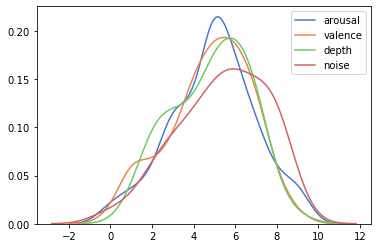

In [78]:
# kdeplot of conditions
sns.kdeplot(mdf.loc[mdf.condition == 'arousal', 'pain_avg'], label='arousal')
sns.kdeplot(mdf.loc[mdf.condition == 'valence', 'pain_avg'], label='valence')
sns.kdeplot(mdf.loc[mdf.condition == 'depth', 'pain_avg'],label='depth')
sns.kdeplot(mdf.loc[mdf.condition == 'noise', 'pain_avg'], label='noise')

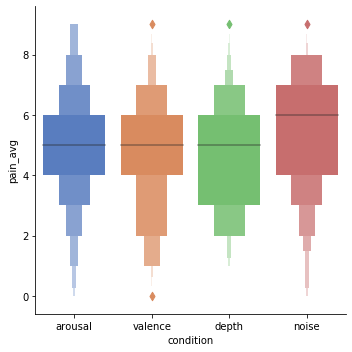

In [79]:
sns.catplot(x='condition', y='pain_avg', kind=catplot_kind, data=mdf)

In [80]:
pd.DataFrame({'mean': round(mdf.groupby('condition').pain_avg.mean(), 2),
             'sd': round(mdf.groupby('condition').pain_avg.std(), 2)})

,mean,sd
condition,,
arousal,4.94,2.05
depth,4.85,1.86
noise,5.37,2.14
valence,4.81,2.00


```
$ANOVA
     Effect DFn DFd        F           p p<.05        ges
2 condition   3 237 5.114079 0.001906612     * 0.01204541

$`Mauchly's Test for Sphericity`
     Effect         W         p p<.05
2 condition 0.9299923 0.3427658      

$`Sphericity Corrections`
     Effect       GGe       p[GG] p[GG]<.05      HFe       p[HF] p[HF]<.05
2 condition 0.9553474 0.002268532         * 0.995103 0.001943267         *


	Pairwise comparisons using paired t tests 

data:  mdf$pain_avg and mdf$condition 

        arousal depth  noise 
depth   1.0000  -      -     
noise   0.0601  0.0200 -     
valence 1.0000  1.0000 0.0074

P value adjustment method: bonferroni 
````

## Pain controlability

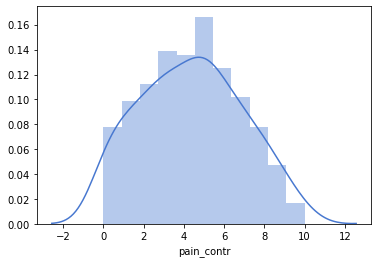

In [81]:
sns.distplot(mdf.pain_contr, bins=11)

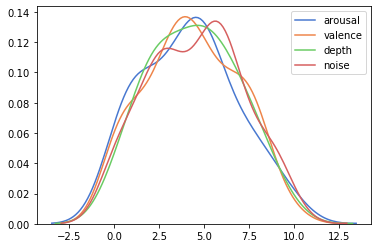

In [82]:
# kdeplot of conditions
sns.kdeplot(mdf.loc[mdf.condition == 'arousal', 'pain_contr'], label='arousal')
sns.kdeplot(mdf.loc[mdf.condition == 'valence', 'pain_contr'], label='valence')
sns.kdeplot(mdf.loc[mdf.condition == 'depth', 'pain_contr'],label='depth')
sns.kdeplot(mdf.loc[mdf.condition == 'noise', 'pain_contr'], label='noise')

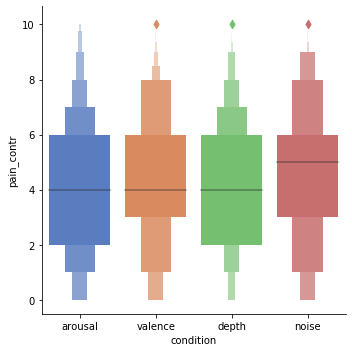

In [83]:
sns.catplot(x='condition', y='pain_contr', kind=catplot_kind, data=mdf)

In [84]:
pd.DataFrame({'mean': round(mdf.groupby('condition').pain_contr.mean(), 2),
             'sd': round(mdf.groupby('condition').pain_contr.std(), 2)})

,mean,sd
condition,,
arousal,4.17,2.62
depth,4.43,2.47
noise,4.53,2.61
valence,4.33,2.58


```
$ANOVA
     Effect DFn DFd        F         p p<.05         ges
2 condition   3 237 1.036717 0.3769966       0.002670408

$`Mauchly's Test for Sphericity`
     Effect         W         p p<.05
2 condition 0.9322175 0.3629107      

$`Sphericity Corrections`
     Effect       GGe     p[GG] p[GG]<.05       HFe     p[HF] p[HF]<.05
2 condition 0.9541436 0.3749287           0.9937909 0.3767258       
````

## Pain threshold

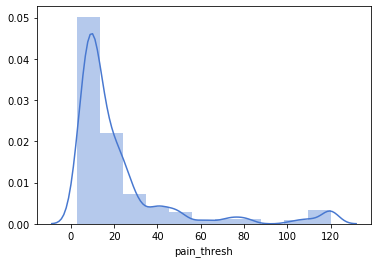

In [85]:
sns.distplot(mdf.pain_thresh, bins=11)

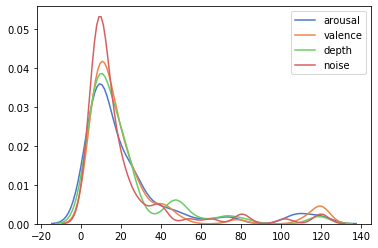

In [86]:
# kdeplot of conditions
sns.kdeplot(mdf.loc[mdf.condition == 'arousal', 'pain_thresh'], label='arousal')
sns.kdeplot(mdf.loc[mdf.condition == 'valence', 'pain_thresh'], label='valence')
sns.kdeplot(mdf.loc[mdf.condition == 'depth', 'pain_thresh'],label='depth')
sns.kdeplot(mdf.loc[mdf.condition == 'noise', 'pain_thresh'], label='noise')

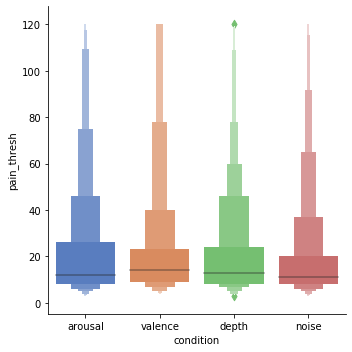

In [87]:
sns.catplot(x='condition', y='pain_thresh', kind=catplot_kind, data=mdf)

In [88]:
pd.DataFrame({'mean': round(mdf.groupby('condition').pain_thresh.mean(), 2),
             'sd': round(mdf.groupby('condition').pain_thresh.std(), 2)})

,mean,sd
condition,,
arousal,23.79,27.44
depth,21.72,22.88
noise,20.10,23.94
valence,23.26,27.38


```
$ANOVA
     Effect DFn DFd        F         p p<.05         ges
2 condition   3 237 1.734115 0.1606629       0.003180239

$`Mauchly's Test for Sphericity`
     Effect         W         p p<.05
2 condition 0.9865736 0.9583857      

$`Sphericity Corrections`
     Effect       GGe     p[GG] p[GG]<.05      HFe     p[HF] p[HF]<.05
2 condition 0.9911006 0.1611774           1.034129 0.1606629          
````

## Pain tolerance

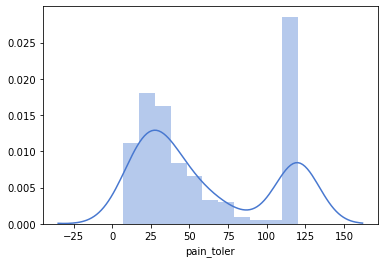

In [89]:
sns.distplot(mdf.pain_toler, bins=11)

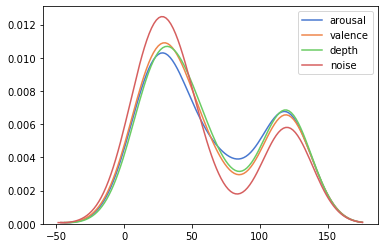

In [90]:
# kdeplot of conditions
sns.kdeplot(mdf.loc[mdf.condition == 'arousal', 'pain_toler'], label='arousal')
sns.kdeplot(mdf.loc[mdf.condition == 'valence', 'pain_toler'], label='valence')
sns.kdeplot(mdf.loc[mdf.condition == 'depth', 'pain_toler'],label='depth')
sns.kdeplot(mdf.loc[mdf.condition == 'noise', 'pain_toler'], label='noise')

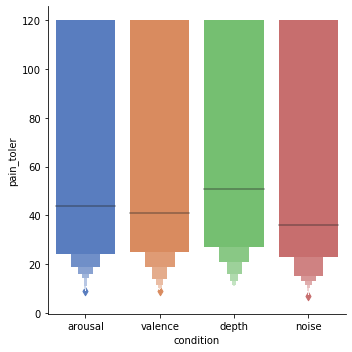

In [91]:
sns.catplot(x='condition', y='pain_toler', kind=catplot_kind, data=mdf)

In [92]:
pd.DataFrame({'mean': round(mdf.groupby('condition').pain_toler.mean(), 2),
             'sd': round(mdf.groupby('condition').pain_toler.std(), 2)})

,mean,sd
condition,,
arousal,62.63,42.06
depth,62.56,41.56
noise,54.17,42.12
valence,60.46,42.18


```
$ANOVA
     Effect DFn DFd        F            p p<.05         ges
2 condition   3 237 7.441212 8.783871e-05     * 0.007056496

$`Mauchly's Test for Sphericity`
     Effect         W        p p<.05
2 condition 0.9625475 0.705124      

$`Sphericity Corrections`
     Effect       GGe        p[GG] p[GG]<.05      HFe        p[HF] p[HF]<.05
2 condition 0.9760963 0.0001029551         * 1.017738 8.783871e-05         *



	Pairwise comparisons using paired t tests 

data:  mdf$pain_toler and mdf$condition 

        arousal depth   noise  
depth   1.00000 -       -      
noise   0.00029 0.00071 -      
valence 1.00000 1.00000 0.01303        
````

## Music mood

Czy faktycznie muza z warunku valence była odbierana jako pogodniejsza?

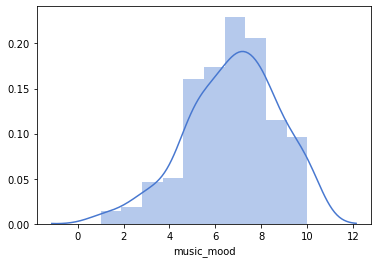

In [93]:
sns.distplot(mdf.music_mood.dropna(), bins=10)

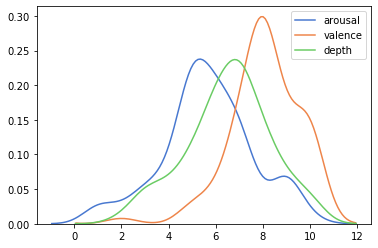

In [94]:
# kdeplot of conditions
sns.kdeplot(mdf.loc[mdf.condition == 'arousal', 'music_mood'], label='arousal')
sns.kdeplot(mdf.loc[mdf.condition == 'valence', 'music_mood'], label='valence')
sns.kdeplot(mdf.loc[mdf.condition == 'depth', 'music_mood'],label='depth')

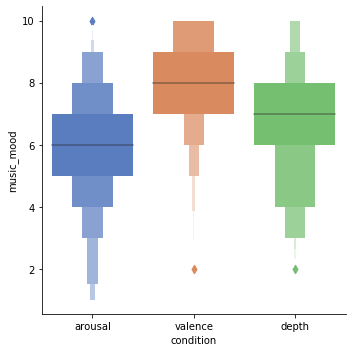

In [98]:
sns.catplot(x='condition', y='music_mood', kind=catplot_kind, data=mdf.loc[mdf.condition != 'noise', :])

In [100]:
pd.DataFrame({'mean': round(mdf.groupby('condition').music_mood.mean(), 2),
             'sd': round(mdf.groupby('condition').music_mood.std(), 2)})

,mean,sd
condition,,
arousal,5.67,1.94
depth,6.52,1.79
noise,NaN,NaN
valence,8.07,1.46


```
$ANOVA
     Effect DFn DFd        F           p p<.05       ges
2 condition   2 158 46.62747 1.21578e-16     * 0.2459389

$`Mauchly's Test for Sphericity`
     Effect         W         p p<.05
2 condition 0.9827919 0.5081608      

$`Sphericity Corrections`
     Effect      GGe        p[GG] p[GG]<.05      HFe       p[HF] p[HF]<.05
2 condition 0.983083 2.112764e-16         * 1.007955 1.21578e-16         *


	Pairwise comparisons using paired t tests 

data:  mdf_nonoise$music_mood and mdf_nonoise$condition 

        arousal depth  
depth   0.0057  -      
valence 3.7e-14 2.3e-08

P value adjustment method: bonferroni 
```

## Own mood

Czy stymulacja zadziałała na coś?

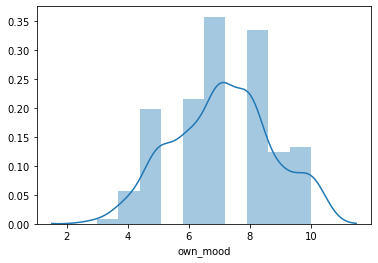

In [31]:
sns.distplot(mdf.own_mood.dropna(), bins=10)

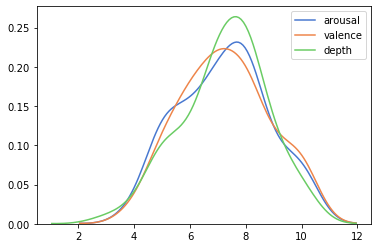

In [101]:
# kdeplot of conditions
sns.kdeplot(mdf.loc[mdf.condition == 'arousal', 'own_mood'], label='arousal')
sns.kdeplot(mdf.loc[mdf.condition == 'valence', 'own_mood'], label='valence')
sns.kdeplot(mdf.loc[mdf.condition == 'depth', 'own_mood'],label='depth')

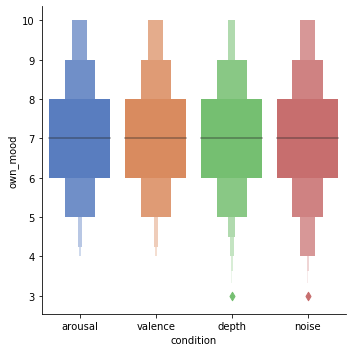

In [102]:
sns.catplot(x='condition', y='own_mood', kind=catplot_kind, data=mdf)

In [103]:
pd.DataFrame({'mean': round(mdf.groupby('condition').own_mood.mean(), 2),
             'sd': round(mdf.groupby('condition').own_mood.std(), 2)})

,mean,sd
condition,,
arousal,7.20,1.58
depth,7.22,1.52
noise,6.78,1.72
valence,7.25,1.58


```
$ANOVA
     Effect DFn DFd        F            p p<.05        ges
2 condition   3 237 6.218754 0.0004406982     * 0.01444658

$`Mauchly's Test for Sphericity`
     Effect         W         p p<.05
2 condition 0.9754081 0.8580434      

$`Sphericity Corrections`
     Effect       GGe        p[GG] p[GG]<.05    HFe        p[HF] p[HF]<.05
2 condition 0.9832956 0.0004805678         * 1.0256 0.0004406982         *


	Pairwise comparisons using paired t tests 

data:  mdf$own_mood and mdf$condition 

        arousal depth  noise 
depth   1.0000  -      -     
noise   0.0109  0.0088 -     
valence 1.0000  1.0000 0.0024

P value adjustment method: bonferroni 
```